# Projekt 1
  
W ramach zadania należy rozwiązać równanie przewodności cieplnej.  
1. Ocena dst lub dst+: zadanie 1  
2. Ocena db: zadanie 2  
3. Ocena bdb: zadanie 3 

## Jednowymiarowe zagadnienie przewodności cieplnej (heat equation)

Równanie:
$$\frac{\partial u}{\partial t} = a^2\frac{\partial^2u}{\partial x^2}$$
  
$0 < x < L, L = \pi$  
$t > 0$  
$a = 0.2$  

Warunek początkowy:  
$f(x) = u(x, 0) = 4\sin^3(2x)$  

Zerowe warunki brzegowe:  
$u(0, t) = u(\pi, t) = 0$

## Zadanie 1
  
Znaleźć rozwiązanie dla równania przewodności cieplnej za pomocą metody rozdzielenia zmiennych.  
Na ocenę 3: rozwiązanie bez użycia **sympy**  
Na ocenę 3.5: rozwiązanie z użyciem **sympy** (tj. znalezienie lub zweryfikowanie uzyskanych "ręcznie" rozwiązań dla równań na funkcję $X(x)$ oraz $T(t)$).  
  
Podpowiedź: Nalezy przyjąć stałą separacji $$\lambda = -\frac{X''(x)}{X(x)}$$.  
Końcowe rozwiązanie, podobnie jak rozwiązanie dla równania struny, ma postać nieskończonej sumy rozwiązań zależnych od indeksu $n = 1, 2, 3, ...$.

In [17]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import math
from sympy import *

In [18]:
n,L,a,x,t,lam=symbols('n L a x t lambda',positive=True)

X=Function('X')
T=Function('T')
u=Function('u')
L=np.pi

Metody rozdzielania zmiennych do wyznaczenia funkcji X(x) i T(y)

Przypisanie równania w postacji ze wzorem do zmiennej


In [19]:
base=Eq(u(x,t).diff(t),a*a*u(x,t).diff(x,2))
base

Eq(Derivative(u(x, t), t), a**2*Derivative(u(x, t), (x, 2)))

Wpisujemy uzyskane funkcją pde_separate wyniki do zmiennych, by potem je wykorzystać

In [20]:
tab=pde_separate(base, u(x, t), [X(x), T(t)], strategy='mul')
s1=tab[0]
s2=tab[1]
s_X1=Eq(X(x).diff(x,2)-s1*X(x),0)
s_X2=Eq(T(t).diff(t)-s2*a**2*T(t),0)

In [21]:
base

Eq(Derivative(u(x, t), t), a**2*Derivative(u(x, t), (x, 2)))

Szukamy rozwiązania w postaci: <br>
$$\ u(x,t)=X(x)*Y(y)$$<br>
$$\ XT'=a^2*X''T$$ <br>
Po przekształceniu:
$$\frac{1}{a^2}*\frac{T'}{T''}=\frac{X''}{X} =-λ $$

A więc mamy 2 równania różniczkowe zwyczajbne

Wyznaczamy funkcjie X(x)

In [22]:
s_X=s1.subs(s1,-lam)
s_X

s_X1=Eq(X(x).diff(x,2)-s_X*X(x),0)
FX = dsolve(s_X1)
FX

Eq(X(x), C1*sin(sqrt(lambda)*x) + C2*cos(sqrt(lambda)*x))

Wyznaczymy $\lambda$

Warunek brzegowy:
$X(0) = C_1 cos(0) + C_2 sin(0) => C_1 = 0 $ 
<br>
<br>
Czyli: <br>
$X(x) = C_2 sin(\sqrt{\lambda}x)$
<br>



In [23]:
tmp=FX.subs(x,0)
C2= tmp.rhs
FXx=FX.subs(C2*cos(sqrt(lam)*x),0)
FXx = FXx.rhs
FXx
FXx = FXx.subs(sin(sqrt(lam)),1)
FXx

C1*sin(sqrt(lambda)*x)

$x = L$, a więc: <br> 
$X(L) = C_2 sin(\sqrt{\lambda}L) = 0$

Funkcja $sin(\theta)$ ma wartośc 0 dla argumentów $\theta$, które są całkowitymi wielokrotnościami liczby $\pi$, a więc:
  

$\sqrt{\lambda} = \frac{n\pi}{L}, n = 1, 2, 3, ... $

In [24]:
s_Y=Eq(T(t).diff(t)-s_X*a**2*T(t),0)
s_Y

Eq(a**2*lambda*T(t) + Derivative(T(t), t), 0)

In [25]:
s_X

-lambda

In [26]:
s_Y
FY=dsolve(s_Y)
FY=FY.rhs
C1 = FY.subs(t,0)
C1
FY

C1*exp(-a**2*lambda*t)

Podstawiamy wyznaczone funkcjie do szukanej postaci funkcji $ U(x,y) $

Funckja u i zamiana C

In [27]:
u = FXx*FY
u = u.subs(C1*C1,C1)
u

C1*exp(-a**2*lambda*t)*sin(sqrt(lambda)*x)

## Zadanie 2
  
Zaprogramować znalezione w zadaniu 1 rozwiązanie, tj. zaimplementować funkcję $u(x, t)$ i zilustrować rozwiązanie na wykresach.
  
Na ocenę 4: poprawna implementacja funkcji $u(x, t)$ oraz przedstawienie rozwiązania na kilku (3-5) wykresach:  
Pierwszy wykres ma przedstawiać wykres funkcji $u(x, t)$ w momencie $t=0$, kolejne zaś funkcję $u(x, t)$ dla kolejnych momentów czasowych ($t>0$) dobranych tak, aby można było zaobserwować na kolejnych wykresach stopniowe wyrównywanie się temperatury.

In [28]:
def f(x):
    return 4*sin(2*x)**3

Rysowanie wykresów

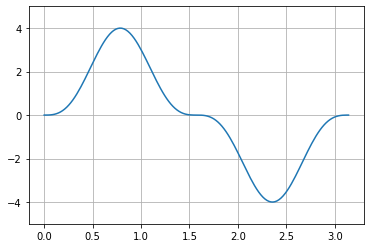

In [29]:
a=0.2
n=np.arange(150)
def f(x):
  return 4*sin(2*x)**3
B = [2/L * quad(lambda x: f(x)*np.sin(n*x), 0, L)[0] for n in range(0,150) ]

def u(x,t):
  return sum(B*np.exp(-a**2*n**2*t)*np.sin(n*x))
u=np.vectorize(u)

x = np.linspace(0,np.pi,150)
fig, ax = plt.subplots()

ax.plot(x, u(x,0))

ax.set_ylim([-5, 5])
ax.grid(True)
plt.show()

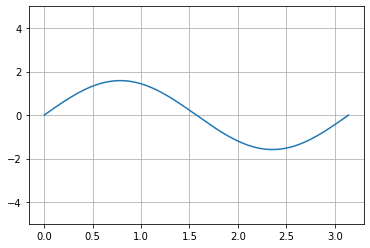

In [30]:
x = np.linspace(0,np.pi,150)
fig, ax = plt.subplots()

ax.plot(x, u(x,4))

ax.set_ylim([-5, 5])
ax.grid(True)
plt.show()

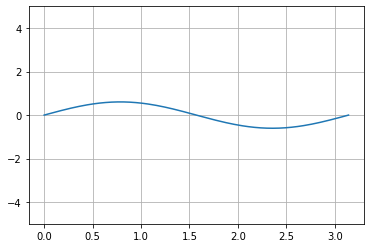

In [31]:
x = np.linspace(0,np.pi,150)
fig, ax = plt.subplots()

ax.plot(x, u(x,10))

ax.set_ylim([-5, 5])
ax.grid(True)
plt.show()

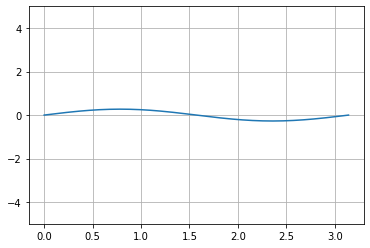

In [32]:
x = np.linspace(0,np.pi,150)
fig, ax = plt.subplots()

ax.plot(x, u(x,15))

ax.set_ylim([-5, 5])
ax.grid(True)
plt.show()